In [1]:
import pandas as pn

df_citibike = pn.read_excel("./ny_citibikes_raw.xlsx")

### 1. Dataset Exploration
  - What information does each column contain?
  - Are there missing or duplicated values?
  - What is the overall time span of the trips? TODO: ESTA MIERDA

Para comenzar a explorar los datos usamos los métodos: `sample()` e `info()`. El primero nos mostrará una muestra aleatoria de entradas en el dataset, el segundo una información general sobre tipos de datos, columnas, numero de entradas y valores nulos.

In [2]:
df_citibike.sample(5)

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
165,2017-01-03 05:20:00,2017-01-03 05:22:00,3213,Van Vorst Park,3186,Grove St PATH,26211,Subscriber,1989,32,25-34,146,2,1,Winter,11,Tuesday
13705,2017-03-08 06:26:00,2017-03-08 06:30:00,3279,Dixon Mills,3186,Grove St PATH,24466,Subscriber,1978,43,35-44,213,4,3,Spring,18,Wednesday
11984,2017-03-03 08:55:00,2017-03-03 09:01:00,3211,Newark Ave,3184,Paulus Hook,26213,Subscriber,1989,32,25-34,364,6,3,Spring,18,Friday
2458,2017-01-17 08:31:00,2017-01-17 08:35:00,3225,Baldwin at Montgomery,3195,Sip Ave,26278,Subscriber,1986,35,35-44,286,5,1,Winter,12,Tuesday
12797,2017-03-05 22:06:00,2017-03-05 22:14:00,3186,Grove St PATH,3192,Liberty Light Rail,26316,Subscriber,1983,38,35-44,488,8,3,Spring,14,Sunday


In [3]:
df_citibike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Start Time            20400 non-null  datetime64[ns]
 1   Stop Time             20400 non-null  datetime64[ns]
 2   Start Station ID      20400 non-null  int64         
 3   Start Station Name    20400 non-null  object        
 4   End Station ID        20400 non-null  int64         
 5   End Station Name      20399 non-null  object        
 6   Bike ID               20400 non-null  int64         
 7   User Type             20400 non-null  object        
 8   Birth Year            20400 non-null  int64         
 9   Age                   20400 non-null  int64         
 10  Age Groups            20400 non-null  object        
 11  Trip Duration         20400 non-null  int64         
 12  Trip_Duration_in_min  20400 non-null  int64         
 13  Month           

Hemos detectado que hay un valor nulo en la columna "End Station Name". Para asegurarnos haremos la suma de todos los valores nulos por columnas, por si se nos ha escapado alguo al observar el output de `info()` a ojo.

In [4]:
df_citibike.isna().sum()

Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        1
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64

Confirmamos que unicamente hay una columna con un valor NA(*not available*). Mostramos la entrada donde falta ese valor.

In [5]:
df_citibike[df_citibike.isna().any(axis=1)]

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
9858,2017-02-25 12:36:00,2017-02-25 12:44:00,3220,5 Corners Library,3211,NaN,24522,Subscriber,1963,58,55-64,532,9,2,Winter,11,Saturday


Por ser un único valor nulo en un conjunto de 20.000 entredas lo desecharemos.

In [6]:
df_citibike.dropna(inplace=True)

A continuación exploraremos si existen duplicados y cuantos. Al ejecutar la siguiente casilla de código veremos que existen 3555 entradas duplicadas. Los eliminaremos por ser insustanciales, quedándonos con unicamente 16845 entradas.

In [7]:
df_citibike.duplicated().sum()

np.int64(3555)

In [8]:
df_citibike.drop_duplicates(inplace=True)

In [9]:
df_citibike.shape

(16844, 17)

# 2. Basic Statistics
  - What is the average trip duration (in minutes)?
  - What is the minimum and maximum duration?
  - What are the most common start and end stations?

In [10]:
df_citibike.loc[:,"Trip_Duration_in_min"].agg(["mean","max", "min"])

mean       9.578307
max     6515.000000
min        1.000000
Name: Trip_Duration_in_min, dtype: float64

In [11]:
df_citibike.value_counts("Start Station ID").head(1)

Start Station ID
3186    2115
Name: count, dtype: int64

In [12]:
df_citibike.value_counts("End Station ID").head(1)

End Station ID
3186    2743
Name: count, dtype: int64

In [13]:
most_common_estation=df_citibike.value_counts("Start Station ID").index[0]
df_citibike.loc[df_citibike["End Station ID"].eq(most_common_estation)]["End Station Name"].drop_duplicates()

26    Grove St PATH
Name: End Station Name, dtype: object

# 3. Users and Demographics
  - How many unique bikes were used?
  - What are the proportions of user types (Subscriber vs Customer)?
  - What is the age distribution of the users? Which age group uses the service the most?

Una forma de muchas para optener el numero de bicicletas es usando la función `unique` sobre la columna `Bike ID` y despues contar cuantos valores únicos existen accediendo al atributo `size` del array numpy.

In [14]:
df_citibike.loc[:, "Bike ID"].unique().size

500

In [15]:
df_citibike.value_counts("User Type", normalize=True).mul(100)

User Type
Subscriber       98.112087
One-time user     1.887913
Name: proportion, dtype: float64

In [16]:
df_por_edad=df_citibike.value_counts("Age", normalize=True).mul(100).head(10)

<Axes: xlabel='Edad', ylabel='Frequiencia en %'>

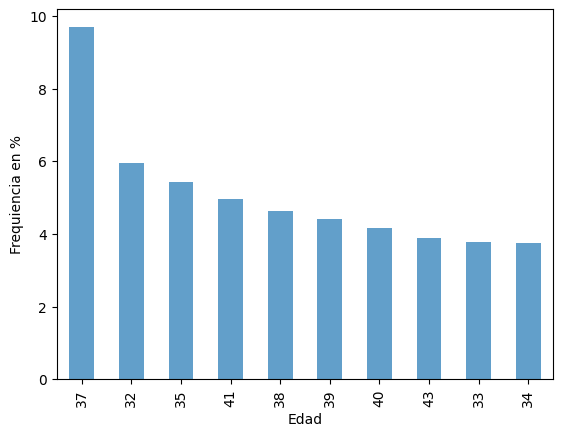

In [17]:
df_por_edad.plot.bar(alpha=0.7, xlabel="Edad", ylabel="Frequiencia en %")

<Axes: title={'center': 'Distribución por edad'}, xlabel='Edad', ylabel='Frecuencia'>

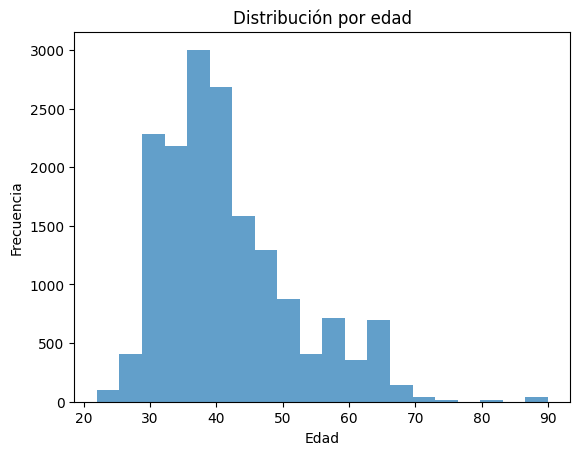

In [18]:
df_citibike["Age"].plot.hist(bins=20, title="Distribución por edad", xlabel="Edad", ylabel="Frecuencia", alpha=0.7)

# 4. Temporal Analysis
  - How does the number of trips vary by weekday?
  - Which month or season has the most rides?
  - What time of day do most trips start?

<Axes: xlabel='Weekday'>

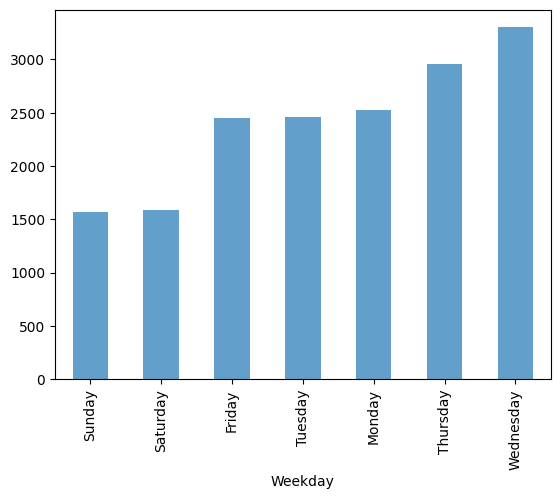

In [19]:
df_citibike.value_counts("Weekday").sort_values().plot.bar(alpha=0.7)

In [20]:
df_citibike.value_counts(["Month", "Season"]).unstack()

Season,Spring,Winter
Month,,
1,NaN,4619.0
2,NaN,5051.0
3,7174.0,NaN


In [21]:
df_citibike["Start Time"].dt.hour.value_counts()

Start Time
8     2196
18    1761
17    1681
7     1210
19    1181
9     1017
16     889
20     750
15     729
13     719
12     712
14     664
10     601
11     544
6      543
21     490
22     381
23     226
5      205
0      141
1       76
4       68
2       38
3       22
Name: count, dtype: int64

<Axes: >

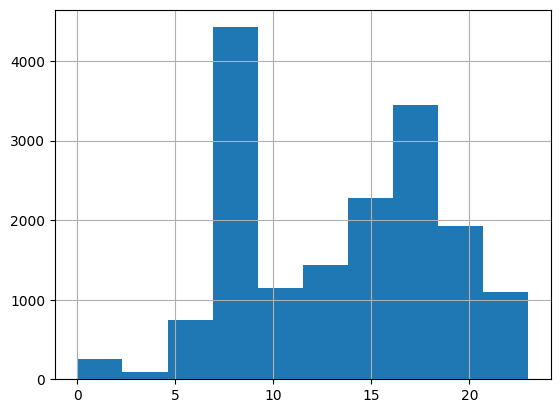

In [22]:
df_citibike["Start Time"].dt.hour.hist(bins=10)

# 5. Geographic Analysis
  - Which station pairs (start → end) appear most often?
  - Are there any stations that appear only as start or only as end stations?

In [23]:
df_citibike.columns

Index(['Start Time', 'Stop Time', 'Start Station ID', 'Start Station Name',
       'End Station ID', 'End Station Name', 'Bike ID', 'User Type',
       'Birth Year', 'Age', 'Age Groups', 'Trip Duration',
       'Trip_Duration_in_min', 'Month', 'Season', 'Temperature', 'Weekday'],
      dtype='object')

In [24]:
df_citibike.groupby(["Start Station ID", "End Station ID"]).size()

Start Station ID  End Station ID
3183              3183              15
                  3184              30
                  3185              48
                  3186              44
                  3187              67
                                    ..
3281              3214               1
                  3220               4
                  3270               1
                  3272               1
                  3281               1
Length: 1154, dtype: int64

In [25]:
df_citibike.sample(4)

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
18859,2017-03-27 18:15:00,2017-03-27 18:24:00,3195,Sip Ave,3272,Jersey & 3rd,29225,Subscriber,1980,41,35-44,595,10,3,Spring,16,Monday
4898,2017-01-30 19:13:00,2017-01-30 19:21:00,3185,City Hall,3202,Newport PATH,24453,Subscriber,1957,64,55-64,501,8,1,Winter,17,Monday
1392,2017-01-11 16:14:00,2017-01-11 16:21:00,3202,Newport PATH,3203,Hamilton Park,26240,Subscriber,1995,26,25-34,439,7,1,Winter,15,Wednesday
2215,2017-01-16 08:41:00,2017-01-16 08:46:00,3267,Morris Canal,3183,Exchange Place,24535,Subscriber,1975,46,45-54,292,5,1,Winter,14,Monday
